In [177]:
import numpy as np
import matplotlib.pyplot as plt
import ECE5242Proj3_train_selected.load_data as ld

In [178]:
"""
Load the data
"""
# Imu
acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z, imu_ts	 = ld.get_imu('ECE5242Proj3_train_selected/data/imu20')

# Encoder
FR, FL, RR, RL, enc_ts = ld.get_encoder('ECE5242Proj3_train_selected/data/Encoders20')

# Lidar
lidar = ld.get_lidar('ECE5242Proj3_train_selected/data/Hokuyo20')

In [179]:
"""
Get distance traveled for 1 tick

Variables:
- L, R: "Encoder ticks in degrees where 360 ticks/counts is 1 revolution"
- e_l, e_r: "In meters, encoder ticks traveled"
- Wheel_diameter: "In meters"
"""
# Calculate how much wheel turns in 1 revolution
wheel_diameter = 0.254
wheel_radius = wheel_diameter / 2
wheel_circumference = 2 * wheel_radius * np.pi # C = 2 * PI * R
tick_distance = wheel_circumference / 360 # Divide wheel into 360 slices to get distance for 1 tick

# Convert ticks to meters
L = (FL + RL) / 2
R = (FR + RR) / 2
e_l = L * tick_distance
e_r = R * tick_distance

### Left and Right Wheel Speed

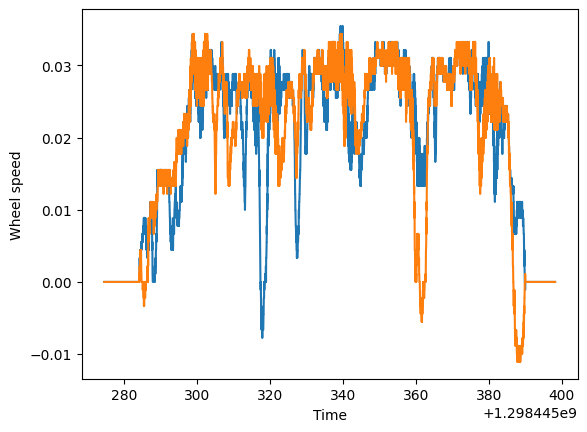

In [180]:
# Initialize figures
fig, ax = plt.subplots()

# Set axes
x = enc_ts
y1 = e_l
y2 = e_r

# Plot each data encoder np array on same plot
ax.plot(x, y1)
ax.plot(x, y2)

ax.set_xlabel("Time")
ax.set_ylabel("Wheel speed")

plt.show()
plt.close()

### Distance robot moved

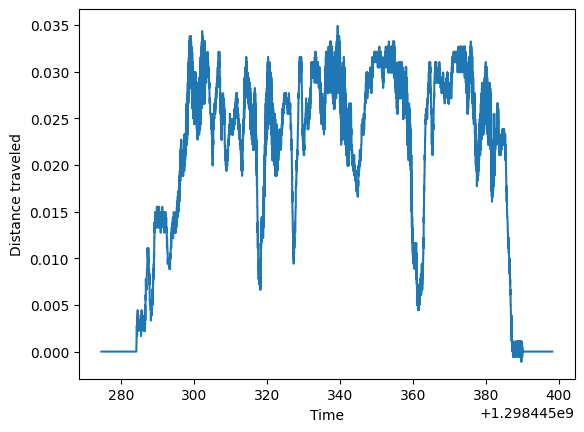

In [181]:
# Get distance traveled by taking average
avg = (e_l + e_r) / 2

# Plot the data
fig, ax = plt.subplots()
x = enc_ts
y = avg
ax.plot(x, y)
ax.set_xlabel("Time")
ax.set_ylabel("Distance traveled")
plt.show()
plt.close()

### Tracking Angular Movement of the Robot

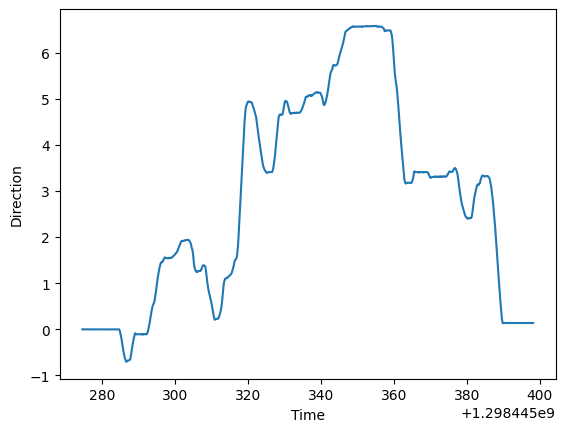

In [237]:
# Get direction traveled in radians
w = 0.31115 * 2.3
theta = (e_r - e_l) / w # Multiply by 2 to account for slippage
for t in range(1, enc_ts.shape[0]):
    theta[t] += theta[t - 1]

# Plot the data
fig, ax = plt.subplots()
x = enc_ts
y = theta
ax.plot(x, y)
ax.set_xlabel("Time")
ax.set_ylabel("Direction")
plt.show()
plt.close()

### Tracking Translational Movement of the Robot
Notes:
- add to lidar data delta_x and delta_y when calculating walls
- add to lidar data theta
- go from polar to cartesian

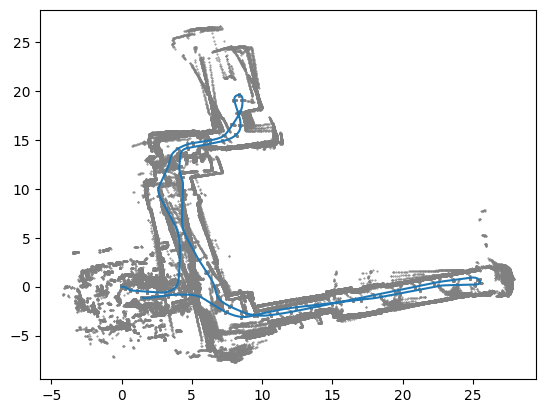

In [238]:
# Take rolling sum of all the points
delta_x = ((e_l + e_r) / 2) * np.cos(theta)
delta_y = ((e_l + e_r) / 2) * np.sin(theta)

# Initialize the plot
fig, ax = plt.subplots()

for t in range(1, enc_ts.shape[0]):
    delta_x[t] += delta_x[t - 1]
    delta_y[t] += delta_y[t - 1]

    # Build walls from polar to cartesian
    rho = lidar[t]['scan'].flatten()
    phi = (lidar[t]['angle'].flatten())
    wall_x = (rho * np.cos(phi + theta[t])) + delta_x[t]
    wall_y = (rho * np.sin(phi + theta[t])) + delta_y[t]
    if t%50 ==0:
        ax.scatter(wall_x, wall_y, c='gray',s=0.2)

# Plot the line
x = delta_x
y = delta_y
ax.plot(x, y)
plt.show()
plt.close()